In [1]:
import os

from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import io

In [6]:
dirpath='C:/Users/moham/Desktop/Data/breastImagesJPEG/train'
categories=['Benign','Cancer','Normal']

for category in categories:
    path = os.path.join(dirpath,category)
    for image in os.listdir(path):
        im_ar=cv2.imread(os.path.join(path,image))
        im_arr=cv2.resize(512,512,3)
        plt.imshow(im_arr)
        plt.show()
        break

error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Input argument doesn't provide sequence protocol
>  - Can't parse 'dsize'. Input argument doesn't provide sequence protocol


In [19]:
dirpath='C:/Users/moham/Desktop/Data/breastImages'
train_datagen = ImageDataGenerator(
    rotation_range=90,
    fill_mode='reflect',
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5,1.2],
    rescale=1./255,
)
train_generator = train_datagen.flow_from_directory(
        directory=dirpath+'/train',
        target_size=(512, 512),
        batch_size=10,
        class_mode='categorical')

Found 2943 images belonging to 3 classes.


In [15]:
# test_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen= ImageDataGenerator(rescale=1./255)


# test_generator = test_datagen.flow_from_directory(
#         dirpath+'/test',
#         target_size=(512, 512),
#         batch_size=1,
#         class_mode='categorical')
# val_generator = val_datagen.flow_from_directory(
#         dirpath+'/val',
#         target_size=(512, 512),
#         batch_size=1,
#         class_mode='categorical')

Found 2943 images belonging to 3 classes.


In [ ]:
print(train_generator.samples)
print(len(train_generator.class_indices))
print(int(train_generator.samples/len(train_generator.class_indices)))


print(test_generator.samples)
print(len(test_generator.class_indices))
print(int(test_generator.samples/len(test_generator.class_indices)))

print(test_generator.class_indices)

In [20]:
imgs, labels= next(train_generator)

In [21]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10,figsize=(50,50))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('on')
    plt.tight_layout
    plt.show()

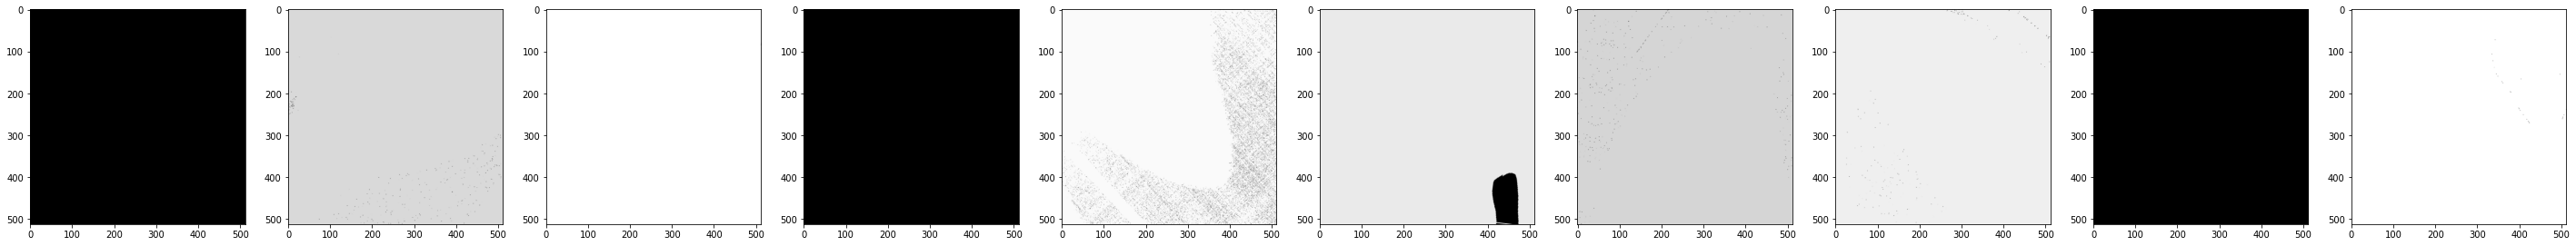

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [22]:
plotImages(imgs)
print(labels)